In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Logistic Regression
- Apply Sigmoid to Linear Regression
<img src="./Figs/2.jpg" alt="Drawing" style="width: 650px;"/>
- Output range [0,1]

### Binary Classification Cost function(Entropy)
$$c_i = -(1-y_i)log(1-\widehat{y_i}) - y_ilog(\widehat{y_i})$$

\begin{equation}
  => c_i=\begin{cases}
    -log(1-\widehat{y_i}), & \text{when $y_i=0$}\\
    -log(\widehat{y_i}), & \text{when $y_i=1$}
  \end{cases}
\end{equation}

### Binary Log Loss(Average Entropy)
$$c = \frac{1}{N} \sum_{i}c_i$$

## Data Exploratory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Time (min)    100 non-null float64
Buy           100 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


None

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


,Time (min),Buy
count,100.000000,100.000000
mean,1.849000,0.500000
std,1.073868,0.502519
min,0.000000,0.000000
25%,1.066667,0.000000
50%,1.858333,0.500000
75%,2.687500,1.000000
max,4.150000,1.000000


1    50
0    50
Name: Buy, dtype: int64

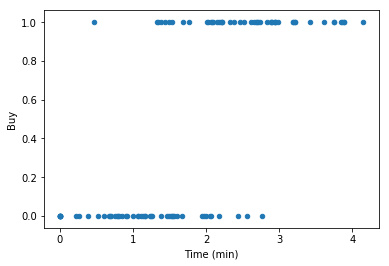

In [2]:
df = pd.read_csv('user_visit_duration.csv')

display(df.info())
display(df.head())
display(df.describe())

display(df['Buy'].value_counts())

df.plot(kind='scatter', x='Time (min)', y='Buy')

## Train/Test split

In [3]:
X = df[['Time (min)']].values
y = df['Buy'].values

display(X.shape)
display(y.shape)

(100, 1)

(100,)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

## Model

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

model = Sequential()

model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train
history = model.fit(
    X_train, y_train,
    epochs=40, verbose=0)

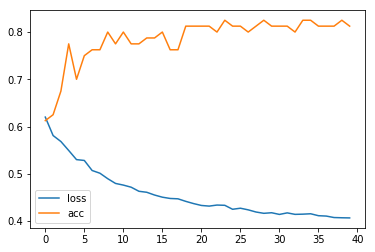

In [7]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

## Class Prediction
- Apply Step function to Logistic Regression
\begin{equation}
  => y\_pred = \begin{cases}
    1, & \text{if $\widehat{y} >= 0.5$}\\
    0, & \text{if $\widehat{y} < 0.5$}
  \end{cases}
\end{equation}
<img src="./Figs/3.jpg" alt="Drawing" style="width: 550px;"/>

## Confusion matrix
- Binary Classification
<img src="./Figs/5.jpg" alt="Drawing" style="width: 550px;"/>

- Multiclass Classification
<img src="./Figs/6.jpg" alt="Drawing" style="width: 550px;"/>

### Accuracy
$$A = \frac{Corrects}{Total} = \frac{TN + TP}{TN + FP + FN + TP}$$

### Error Rate
$$ER = \frac{Wrongs}{Total} = \frac{FP + FN}{TN + FP + FN + TP}$$

### Precision
Test = positive, How often prediction correct?
$$P = \frac{True Positive}{Test Positive} = \frac{TP}{TP + FP}$$

- Example: Spam email filter model
    + Acceptable if spam detected as not spam
    + False Negative is OK, False Positive is not accepted
    + Need high Precision

### Recall
Actual value positive, How often prediction correct?
$$R = \frac{True Positive}{Actual Positive} = \frac{TP}{TP+FN}$$

- Example: Cancer diagnosing model
    + Acceptable if non-cancer detected as cancer
    + False Positive is OK, False Negative is not
    + Need high Recall

### F1 Score
High if both Precision and Recall High
$$F1 = \frac{2*P*R}{P+R}$$

### $F_\beta$ score

$$F_\beta = (1+\beta^2)\frac{P*R}{\beta^2*P+R}$$

- $\beta$ is in range $[0, \infty]$
    + If $\beta = 0$, $F_\beta = Precision$
    + If $\beta = 1$, $F_\beta = F1$
    + If $\beta = \infty$, $F_\beta = Recall$

## AUC-ROC Area Under the Curve of the Receiver Operating Characteristic
### Split
- Example: 1D Split
    + Perfect Split
    + Good Split
    + Random Split

<img src="./Figs/9.jpg" alt="Drawing" style="width: 750px;"/>

### True positive rate (TPR) - aka: sensitivity, hit rate, recall
$$TPR = \frac{True\ Positive}{All\ Positive} = \frac{TP}{TP+FN}$$

### False positive rate (FPR) - aka: fall-out
$$FPR = \frac{False\ Positive}{All\ Negative} = \frac{FP}{FP+TN}$$

### AUC - ROC
- ROC = Curve
    + Find all possible splits on the dataset
    + Construct all pairs of (TPR, FPR)
    + Draw the Curve 
- AUC = The Area under the Curve
    - AUC range [0, 1]
        - Random model AUC = 0.5
        - Perfect model AUC = 1.0
        - Good model AUC > 0.8
        - Bad model AUC < 0.5

<img src="./Figs/8.png" alt="Drawing" style="width: 550px;"/>

In [8]:
## Class Prediction
y_train_class_pred = model.predict(X_train) > 0.5 # y_train_class_pred = model.predict_classes(X_train)
y_test_class_pred = model.predict(X_test) > 0.5 # y_test_class_pred = model.predict_classes(X_test)

In [9]:
## Confusion matrix
from sklearn.metrics import confusion_matrix

print("The train confusion matrix:")
print(confusion_matrix(y_train, y_train_class_pred))
print('')
print("The test confusion matrix:")
print(confusion_matrix(y_test, y_test_class_pred))

The train confusion matrix:
[[30  8]
 [ 7 35]]

The test confusion matrix:
[[10  2]
 [ 0  8]]


In [10]:
## Accuracy
from sklearn.metrics import accuracy_score

print("The train Accuracy score is {:0.3f}".format(accuracy_score(y_train, y_train_class_pred)))
print("The test Accuracy score is {:0.3f}".format(accuracy_score(y_test, y_test_class_pred)))

The train Accuracy score is 0.812
The test Accuracy score is 0.900


In [11]:
## Precision
from sklearn.metrics import precision_score

print("The train Precision score is {:0.3f}".format(precision_score(y_train, y_train_class_pred)))
print("The test Precision score is {:0.3f}".format(precision_score(y_test, y_test_class_pred)))

The train Precision score is 0.814
The test Precision score is 0.800


In [12]:
## Recall
from sklearn.metrics import recall_score

print("The train Recall score is {:0.3f}".format(recall_score(y_train, y_train_class_pred)))
print("The test Recall score is {:0.3f}".format(recall_score(y_test, y_test_class_pred)))

The train Recall score is 0.833
The test Recall score is 1.000


In [13]:
## F1 score
from sklearn.metrics import f1_score

print("The train F1 score is {:0.3f}".format(f1_score(y_train, y_train_class_pred)))
print("The test F1 score is {:0.3f}".format(f1_score(y_test, y_test_class_pred)))

The train F1 score is 0.824
The test F1 score is 0.889


In [14]:
## Report
from sklearn.metrics import classification_report

print("The train classification report:")
print(classification_report(y_train, y_train_class_pred))
print('')
print("The test classification report:")
print(classification_report(y_test, y_test_class_pred))

The train classification report:
             precision    recall  f1-score   support

          0       0.81      0.79      0.80        38
          1       0.81      0.83      0.82        42

avg / total       0.81      0.81      0.81        80


The test classification report:
             precision    recall  f1-score   support

          0       1.00      0.83      0.91        12
          1       0.80      1.00      0.89         8

avg / total       0.92      0.90      0.90        20



## Cross Validation
- Tradeoff Computational power <-> Accuracy
- Can you distributed computing or parallelization to Train multiple Cross validation
<img src="./Figs/4.jpg" alt="Drawing" style="width: 550px;"/>


In [15]:
from keras.wrappers.scikit_learn import KerasClassifier

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [16]:
model = KerasClassifier(
    build_fn=build_logistic_regression_model,
    epochs=25, verbose=0)

In [17]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(
    model,
    X, y,
    cv=KFold(3, shuffle=True))

display(scores)
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

array([0.85294118, 0.84848485, 0.6969697 ])

The cross validation accuracy is 0.7995 ± 0.0725
